# Explorative Data Analysis
In this Notebook we show some example data analysis on the UN Security Council dataset. 

The first step is getting the data and data cleaning.

## Data Loading
Below we read all the data from our database, and put it in raw, uncleaned, Pandas dataframes

In [84]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Read the DB info and credentials from our .env file
load_dotenv("../Database/database.env")
DB_HOSTNAME = os.getenv('POSTGRES_HOSTNAME')
DB_USERNAME = os.getenv('POSTGRES_USER')
DB_PASSWORD = os.getenv('POSTGRES_PASSWORD')
DB_NAME = os.getenv('POSTGRES_DB')

engine = create_engine(f'postgresql+psycopg2://{DB_USERNAME}:{DB_PASSWORD}@{DB_HOSTNAME}/{DB_NAME}', echo=False)
meetings_df = pd.read_sql_table('meeting', con=engine)
resolutions_df = pd.read_sql_table('resolution', con=engine)
vetoes_df = pd.read_sql_table('vetocasts', con=engine)
states_df = pd.read_sql_table('state', con=engine)

## UN Security Council Meetings

First we take a look at all the meeting rows.

In [85]:
meetings_df

,meeting_id,topic,full_text,url,date,year,veto_used_in_meeting
0,S/PV.49,The Spanish question,tau\nwhich could be agreed to by all of us) an...,https://undocs.org/en/S/PV.49,26 June,1946,True
1,S/PV.8436,The situation in the Middle East,United Nations\nS/PV.8436\nSecurity Council\nS...,https://undocs.org/en/S/PV.8436,21 December,2018,False
2,S/PV.8401,The situation in the Central African Republic,United Nations\nS/PV.8401\nSecurity Council\nS...,https://undocs.org/en/S/PV.8401,15 November,2018,False
3,S/PV.8398,The situation in Somalia,United Nations\nS/PV.8398\nSecurity Council\nS...,https://undocs.org/en/S/PV.8398,14 November,2018,False
4,S/PV.8400,Reports of the Secretary-General on the Sudan ...,United Nations\nS/PV.8400\nSecurity Council\nS...,https://undocs.org/en/S/PV.8400,15 November,2018,False
...,...,...,...,...,...,...,...
2609,S/PV.9054,Reports of the Secretary-General on the Sudan ...,United Nations\nS/PV.9054\nSecurity Council\nS...,https://undocs.org/en/S/PV.9054,3 June,2022,False
2610,S/PV.8979,Letter dated 28 February 2014 from the Perman...,United Nations\nS/PV.8979\nSecurity Council\nS...,https://undocs.org/en/S/PV.8979,25 February,2022,True
2611,S/PV.8981,The situation in the Middle East,United Nations\nS/PV.8981\nSecurity Council\nS...,https://undocs.org/en/S/PV.8981,28 February,2022,False
2612,S/PV.9025,The situation in Libya,United Nations\nS/PV.9025\nSecurity Council\nS...,https://undocs.org/en/S/PV.9025,29 April,2022,False


If we only want to see the meetings in which a veto was used, we can leverage the last column `veto_used_in_meeting`:

In [3]:
meetings_df.query('veto_used_in_meeting==True')

,meeting_id,topic,full_text,url,date,year,veto_used_in_meeting
0,S/PV.49,The Spanish question,tau\nwhich could be agreed to by all of us) an...,https://undocs.org/en/S/PV.49,26 June,1946,True
21,S/PV.8274,"The situation in the Middle East, including th...",United Nations\nS/PV.8274\nSecurity Council\nS...,https://undocs.org/en/S/PV.8274,1 June,2018,True
53,S/PV.8228,The situation in the Middle East,United Nations\nS/PV.8228\nSecurity Council\nS...,https://undocs.org/en/S/PV.8228,10 April,2018,True
56,S/PV.188,The Greek question,NATIONS UNIES\nSECURITY COUNCIL\n-\nOFFICIAL R...,https://undocs.org/en/S/PV.188,19 August,1947,True
62,S/PV.8190,The situation in the Middle East,United Nations\nS/PV.8190\nSecurity Council\nS...,https://undocs.org/en/S/PV.8190,26 February,2018,True
...,...,...,...,...,...,...,...
2365,S/PV.988,Complaint by Portugal (Goa),,https://undocs.org/en/S/PV.988,18 December,1961,True
2376,S/PV.1704,Consideration of measures for the maintenance ...,UNITED NATIONS \nMEETING: 21 MARCH 1973 \nPANA...,https://undocs.org/en/S/PV.1704(OR),21 March,1973,True
2389,S/PV.2519,The situation in the Middle East,UNITED NATIONS \nTHIRTY-NINTH \nYEAR \n2519’” ...,https://undocs.org/en/S/PV.2519(OR),29 February,1984,True
2447,S/PV.5488,"Middle East situation, including the Palestini...",\nUnited Nations \n \nS/PV.5488\n \n \n \nSec...,https://undocs.org/en/S/PV.5488,13 July,2006,True


In [4]:
vetoes_df.count()

vetoed_resolution    213
state_id             213
dtype: int64

### UN Security Council Discussed Resolutions

We can also take a look at the different resolutions discussed during the above mentioned meetings:

In [86]:
resolutions_df

,id,draft_id,final_id,draft_url,final_url,status,draft_text,final_text,year,meeting_id
0,1,S/PV.49,None,https://undocs.org/en/S/PV.49,None,vetoed,tau\nwhich could be agreed to by all of us) an...,,1946,S/PV.49
1,5,S/2018/1143,S/RES/2450(2018),https://undocs.org/en/S/2018/1143,https://undocs.org/en/S/RES/2450(2018),adopted,\nUnited Nations \n \nS/2018/1143 \n \n \nSec...,\nUnited Nations \n \nS/RES/2450 (2018) \n \n...,2018,S/PV.8436
2,6,S/2018/1025,S/RES/2446(2018),https://undocs.org/en/S/2018/1025,https://undocs.org/en/S/RES/2446(2018),adopted,\nUnited Nations \n \nS/2018/1025 \n \n \nSec...,\nUnited Nations \n \nS/RES/2446 (2018) \n \n...,2018,S/PV.8401
3,7,S/2018/1010,S/RES/2444(2018),https://undocs.org/en/S/2018/1010,https://undocs.org/en/S/RES/2444(2018),adopted,\nUnited Nations \n \nS/2018/1010 \n \n \nSec...,\nUnited Nations \n \nS/RES/2444 (2018) \n \n...,2018,S/PV.8398
4,8,S/2018/1021,S/RES/2445(2018),https://undocs.org/en/S/2018/1021,https://undocs.org/en/S/RES/2445(2018),adopted,\nUnited Nations \n \nS/2018/1021 \n \n \nSec...,\nUnited Nations \n \nS/RES/2445 (2018) \n \n...,2018,S/PV.8400
...,...,...,...,...,...,...,...,...,...,...
2685,3017,S/2022/443,S/RES/2636(2022),https://undocs.org/en/S/2022/443,https://undocs.org/en/S/RES/2636(2022),adopted,\nUnited Nations \n \nS/2022/443 \n \n \nSecu...,\nUnited Nations \n \nS/RES/2636 (2022) \n \n...,2022,S/PV.9054
2686,3019,S/2022/155,None,https://undocs.org/en/S/2022/155,None,vetoed,\nUnited Nations \n \nS/2022/155 \n \n \nSecu...,,2022,S/PV.8979
2687,3020,S/2022/158,S/RES/2624(2022),https://undocs.org/en/S/2022/158,https://undocs.org/en/S/RES/2624(2022),adopted,\nUnited Nations \n \nS/2022/158 \n \n \nSecu...,\nUnited Nations \n \nS/RES/2624 (2022) \n \n...,2022,S/PV.8981
2688,3021,S/2022/356,S/RES/2629(2022),https://undocs.org/en/S/2022/356,https://undocs.org/en/S/RES/2629(2022),adopted,\nUnited Nations \n \nS/2022/356 \n \n \nSecu...,\nUnited Nations \n \nS/RES/2629 (2022) \n \n...,2022,S/PV.9025


### All Data together in one dataframe
For further data analysis, we will merge the above 2 dataframes into 1 Pandas dataframe.
Relevant columns are `status` (`adopted`, `not adopted`, or `vetoed`), the column `vetoed_by` which only has a value whenever the status is `vetoed`. 



In [87]:
meetings_and_resolutions_df = resolutions_df.merge(meetings_df, how="inner", on=["meeting_id","year"])

The last column `veto_used_in_meeting` shows whether in the meeting a veto was cast. 

This may show `True` even though a resolution on that line was adopted. This only means that in the meeting there was more than one resolution discussed, and at least one other resolution was vetoed. You can also see that if a `draft resolution` is adopted, its final accepted id changes and takes the form `S/RES/XXX(YYYY)` where `YYYY` stands for the year.

**Example**:

In [91]:
meetings_and_resolutions_df.query('meeting_id == "S/PV.906"')[['meeting_id', 'draft_id', 'final_id', 'status']]

,meeting_id,draft_id,final_id,status
1605,S/PV.906,S/4523,None,vetoed
1606,S/PV.906,S/4519,None,not adopted
1607,S/PV.906,S/4525,S/RES/157(1960),adopted


In [100]:
meetings_and_resolutions_df[meetings_and_resolutions_df['topic'].str.contains("Bosnia")][['meeting_id', 'draft_id', 'final_id', 'topic', 'date', 'year', 'status']]

,meeting_id,draft_id,final_id,topic,date,year,status
35,S/PV.8392,S/2018/989,S/RES/2443(2018),The situation in Bosnia and Herzegovina,6 November,2018,adopted
74,S/PV.8658,S/2019/859,S/RES/2496(2019),The situation in Bosnia and Herzegovina,5 November,2019,adopted
162,S/PV.8896,S/2021/913,S/RES/2604(2021),The situation in Bosnia and Herzegovina,3 November,2021,adopted
213,S/2020/108,S/2020/1080,S/RES/2549(2020),The situation in Bosnia and Herzegovina,5 November,2020,adopted
493,S/PV.7481,S/2015/508,None,The situation in Bosnia and Herzegovina,8 July,2015,vetoed
...,...,...,...,...,...,...,...
2576,S/PV.3909,S/1998/648,S/RES/1184(1998),Bosnia and Herzegovina,16 July,1998,adopted
2589,S/PV.5567,S/2006/900,S/RES/1722(2006),Bosnia and Herzegovina,21 November,2006,adopted
2592,S/PV.5782,S/2007/673,S/RES/1785(2007),Bosnia and Herzegovina,21 November,2007,adopted
2606,S/PV.7803,S/2016/935,S/RES/2315(2016),The situation in Bosnia and Herzegovina,8 November,2016,adopted


### Veto Analysis
In this section we will take a look at the usage of the veto votes by the different P5 members.

To start, we'll need the 2 other data frames `vetoes_df` and `states_df` from our dataset to figure out what resolution has been vetoed, and by which members.


In [92]:
vetoes_w_names_df = vetoes_df.merge(states_df, how="inner", on="state_id")
vetoes_w_names_df

,vetoed_resolution,state_id,name
0,S/PV.49,5,Russia
1,S/2018/321,5,Russia
2,S/2018/156,5,Russia
3,S/2019/756,5,Russia
4,S/2019/186,5,Russia
...,...,...,...
211,S/11713,3,France
212,S/11967,3,France
213,S/14459,3,France
214,S/14460/Rev.1,3,France


We can now also see in which meetings what P5 members cast vetoes:

In [93]:
all_data_vetoed_df = meetings_and_resolutions_df.merge(vetoes_df, how="inner", left_on="draft_id", right_on="vetoed_resolution")
all_data_vetoed_w_state_names_df = vetoes_df.merge(states_df, how="inner", on="state_id")
all_data_vetoed_df

vetoed_resolutions_df=vetoes_w_names_df.merge(all_data_vetoed_df, how="inner",left_on=["vetoed_resolution","vetoed_resolution","state_id"],right_on=["vetoed_resolution","draft_id","state_id"])
vetoed_resolutions_df

,vetoed_resolution,state_id,name,id,draft_id,final_id,draft_url,final_url,status,draft_text,final_text,year,meeting_id,topic,full_text,url,date,veto_used_in_meeting
0,S/PV.49,5,Russia,1,S/PV.49,None,https://undocs.org/en/S/PV.49,None,vetoed,tau\nwhich could be agreed to by all of us) an...,,1946,S/PV.49,The Spanish question,tau\nwhich could be agreed to by all of us) an...,https://undocs.org/en/S/PV.49,26 June,True
1,S/2018/321,5,Russia,48,S/2018/321,None,https://undocs.org/en/S/2018/321,None,vetoed,\nUnited Nations \n \nS/2018/321 \n \n \nSecu...,,2018,S/PV.8228,The situation in the Middle East,United Nations\nS/PV.8228\nSecurity Council\nS...,https://undocs.org/en/S/PV.8228,10 April,True
2,S/2018/156,5,Russia,62,S/2018/156,None,https://undocs.org/en/S/2018/156,None,vetoed,\nUnited Nations \n \nS/2018/156 \n \n \nSecu...,,2018,S/PV.8190,The situation in the Middle East,United Nations\nS/PV.8190\nSecurity Council\nS...,https://undocs.org/en/S/PV.8190,26 February,True
3,S/2019/756,5,Russia,75,S/2019/756,None,https://undocs.org/en/S/2019/756,None,vetoed,\nUnited Nations \n \nS/2019/756 \n \n \nSecu...,,2019,S/PV.8623,The situation in the Middle East,United Nations\nS/PV.8623\nSecurity Council\nS...,https://undocs.org/en/S/PV.8623,19 September,True
4,S/2019/186,5,Russia,93,S/2019/186,None,https://undocs.org/en/S/2019/186,None,vetoed,\nUnited Nations \n \nS/2019/186 \n \n \nSecu...,,2019,S/PV.8476,The situation in the Bolivarian Republic of Ve...,United Nations\nS/PV.8476\nSecurity Council\nS...,https://undocs.org/en/S/PV.8476,28 February,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,S/11713,3,France,1810,S/11713,None,https://undocs.org/en/S/11713,None,vetoed,Distr. \nGENERAL \nS/11713 \n6 June 1975 \nORI...,,1975,S/PV.1829,The situation in Namibia,UNITED NATIONS \nSECURITY COUNCIL \nOFFICIAL \...,https://undocs.org/en/S/PV.1829(OR),06 June,True
212,S/11967,3,France,1817,S/11967,None,https://undocs.org/en/S/11967,None,vetoed,Distr. \nGENERAL \ns/=967 \n5 February \n1976 ...,,1976,S/PV.1888,The situation in the Comoros,UNITED NATIONS \nSECURITY COUNCIL \nOFFICIAL \...,https://undocs.org/en/S/PV.1888(OR),06 February,True
213,S/14459,3,France,1843,S/14459,None,https://undocs.org/en/S/14459,None,vetoed,",, Y\?i,q?zz Panama, Tunisia \nand Uganda: \nM...",,1981,S/PV.2277,The situation in Namibia,UNITED NATIONS \nTHIRTY-SIXTH \nYEAR \nNEW YOR...,https://undocs.org/en/S/PV.2277(OR),30 April,True
214,S/14460/Rev.1,3,France,1844,S/14460/Rev.1,None,https://undocs.org/en/S/14460/Rev.1,None,vetoed,Distr. \nGENERAL \nS/l4460/Rev.l \n29 April \n...,,1981,S/PV.2277,The situation in Namibia,UNITED NATIONS \nTHIRTY-SIXTH \nYEAR \nNEW YOR...,https://undocs.org/en/S/PV.2277(OR),30 April,True


The following example shows a UN Security Council Meeting where a resolution was discussed, vetoed by 2 P5 members:

In [10]:
vetoed_resolutions_df.query('meeting_id=="S/PV.8476"')

,vetoed_resolution,state_id,name,id,draft_id,final_id,draft_url,final_url,status,draft_text,final_text,year,meeting_id,topic,full_text,url,date,veto_used_in_meeting
4,S/2019/186,5,Russia,93,S/2019/186,None,https://undocs.org/en/S/2019/186,None,vetoed,\nUnited Nations \n \nS/2019/186 \n \n \nSecu...,,2019,S/PV.8476,The situation in the Bolivarian Republic of Ve...,United Nations\nS/PV.8476\nSecurity Council\nS...,https://undocs.org/en/S/PV.8476,28 February,True
165,S/2019/186,4,China,93,S/2019/186,None,https://undocs.org/en/S/2019/186,None,vetoed,\nUnited Nations \n \nS/2019/186 \n \n \nSecu...,,2019,S/PV.8476,The situation in the Bolivarian Republic of Ve...,United Nations\nS/PV.8476\nSecurity Council\nS...,https://undocs.org/en/S/PV.8476,28 February,True


We now would like to get an overview of who are the most prominent veto casters according to our dataset.

name
China     16
France    11
Russia    88
UK        22
USA       76
dtype: int64


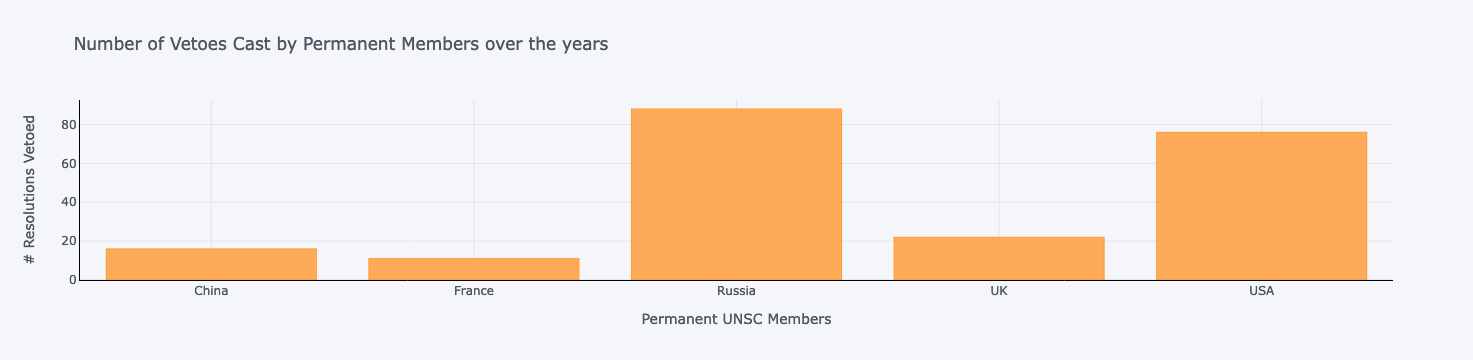

In [11]:
print(vetoes_w_names_df.groupby('name').size())

# cufflinks are required, else we end up with an error "AttributeError: 'Series' object has no attribute 'iplot'"
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

vetoes_w_names_df.groupby('name').count()['vetoed_resolution'].iplot(
    kind='bar',
    yTitle='# Resolutions Vetoed',
    linecolor='black',
    opacity=0.8,
    title='Number of Vetoes Cast by Permanent Members over the years',
    xTitle='Permanent UNSC Members'
)

## Text Pre-processing
In this part we'll pre-process the text so we can use it for further analysis. Since this is all text analysis, we will only look at text data after 1994. We know that the text from OCR'd transcripts prior to 1994 is not reliable. Further we will use language detection, and delete records that are not recognized as valid English.


### Step 1: Only keep the features (columns) and rows we're really interested in



In [12]:
pre_processed_df = meetings_and_resolutions_df.copy()

# Convert the year column to be numeric instead of string
pre_processed_df['year']=pd.to_numeric(pre_processed_df['year'])

# Get rid of the columns we won't use now
pre_processed_df.drop(['draft_url','final_url','url','date'], axis=1,inplace=True)

# Get rid of rows where we do not have the meeting transcript from...
pre_processed_df = pre_processed_df[~pre_processed_df.full_text.isnull()]

# ..and keep only the rows where the year is at least 1994
pre_processed_df = pre_processed_df[pre_processed_df.year >= 1994]

pre_processed_df

,id,draft_id,final_id,status,draft_text,final_text,year,meeting_id,topic,full_text,veto_used_in_meeting
1,5,S/2018/1143,S/RES/2450(2018),adopted,\nUnited Nations \n \nS/2018/1143 \n \n \nSec...,\nUnited Nations \n \nS/RES/2450 (2018) \n \n...,2018,S/PV.8436,The situation in the Middle East,United Nations\nS/PV.8436\nSecurity Council\nS...,False
2,6,S/2018/1025,S/RES/2446(2018),adopted,\nUnited Nations \n \nS/2018/1025 \n \n \nSec...,\nUnited Nations \n \nS/RES/2446 (2018) \n \n...,2018,S/PV.8401,The situation in the Central African Republic,United Nations\nS/PV.8401\nSecurity Council\nS...,False
3,7,S/2018/1010,S/RES/2444(2018),adopted,\nUnited Nations \n \nS/2018/1010 \n \n \nSec...,\nUnited Nations \n \nS/RES/2444 (2018) \n \n...,2018,S/PV.8398,The situation in Somalia,United Nations\nS/PV.8398\nSecurity Council\nS...,False
4,8,S/2018/1021,S/RES/2445(2018),adopted,\nUnited Nations \n \nS/2018/1021 \n \n \nSec...,\nUnited Nations \n \nS/RES/2445 (2018) \n \n...,2018,S/PV.8400,Reports of the Secretary-General on the Sudan ...,United Nations\nS/PV.8400\nSecurity Council\nS...,False
5,9,S/2018/990,S/RES/2442(2018),adopted,\nUnited Nations \n \nS/2018/990 \n \n \nSecu...,\nUnited Nations \n \nS/RES/2442 (2018) \n \n...,2018,S/PV.8391,The situation in Somalia,United Nations\nS/PV.8391\nSecurity Council\nS...,False
...,...,...,...,...,...,...,...,...,...,...,...
2661,2993,S/2016/241,S/RES/2274(2016),adopted,\nUnited Nations \n \nS/2016/241 \n \n \nSecu...,\nUnited Nations \n \nS/RES/2274 (2016) \n \n...,2016,S/PV.7645,The situation in Afghanistan,*1607042*\n16-07042 (E)\nThis record contains ...,False
2663,2995,S/1994/96,S/RES/896(1994),adopted,UNITED\nUNITED\nS\nNATIONS\nNATIONS\nSecurity ...,UNITED\nUNITED\nS\nNATIONS\nNATIONS\nSecurity ...,1994,S/PV.3332,Georgia,UNITED\nS\nNATIONS\nSecurity Council \nPROVISI...,False
2664,2996,S/2006/1013,S/RES/1735(2006),adopted,\nUnited Nations \n \nS/2006/1013\n \n \n \nS...,\nUnited Nations \n \nS/RES/1735 (2006)\n \n ...,2006,S/PV.5609,Peace and security — terrorist acts,\nUnited Nations \n \nS/PV.5609\n \n \n \nSec...,False
2665,2997,S/2004/774,S/RES/1565(2004),adopted,United Nations\nS/2004/774\n \nSecurity Counci...,United Nations\nS/RES/1565 (2004)\n \nSecurity...,2004,S/PV.5048,Democratic Republic of the Congo,United Nations\nS/PV.5048\n \nSecurity Council...,False


### Step 2: Cleaning of Text
Here we clean text from metadata like headers, footers, words between parenthesis, and other items showing up often as noise and do not bring immediate value to the semantics of the text.

In [13]:
import re

# Convert strings to lowercase
pre_processed_df['text_cleaned'] = pre_processed_df['full_text'].apply(
    lambda x: x.lower()
)

pre_processed_df[['meeting_id','text_cleaned']]

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: x.replace('united nations', '')
)

# Common words that show up too often
pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: x.replace('draft', '')
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: x.replace('council', '')
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: x.replace('resolution', '')
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: x.replace('security council', '')
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: x.replace('secretary general', '')
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: x.replace('international', '')
)


# Remove meeting numbers
pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('s\/pv\.\d{1,4}', '', x)
)

# Remove draft resolution identifiers
pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('(s\/\d{4}\/\d{1,4})', '', x)
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('[a-z]+\-[a-z]+ year', '', x)
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('\d{1,5}st meeting', '', x)
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('\d{1,5}nd meeting', '', x)
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('\d{1,5}rd meeting', '', x)
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('\d{1,5}th meeting', '', x)
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('(monday|tuesday|wednesday|thursday|friday|saturday|sunday),.*', '', x)
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('(january|february|march|april|may|june|july|august|september|october|november|december),.*', '', x)
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: x.replace('new york', '')
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: x.replace('provisional', '')
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: x.replace('president', '')
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('mr\. .*', '', x)
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('ms\. .*', '', x)
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('mrs\. .*', '', x)
)

# Remove what's between parenthesis...speakers do not use parenthesis verbally, so consider it as metadata
pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('\(.*\)', '', x)
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: x.replace('members:', '')
)

# Get rid of the member countries in the header..they are always suffixed with dots... .
pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('.{4,80}(\.\s)+', '', x)
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: x.replace('agenda', '')
)

#--
# Remove dates
pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('\d{1,2}\/\d{1,2}\/\d{4}', '', x)
)

# Remove items like 18-02468 and *1802468*
pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('\d{1,2}\-\d{1,30}', '', x)
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('\*\d+\*', '', x)
)

# Remove items like 2/2 - potentially we may see 10/20 for a very long transcript?
pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('\d{1,2}\/\d{1,2}', '', x)
)


# Remove timestamps
pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('\d{1,2}\.\d{1,2} a\.m\.', '', x)
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('\d{1,2}\.\d{1,2} p\.m\.', '', x)
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('\d{1,2}\:\d{1,2} a\.m\.', '', x)
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('\d{1,2}\:\d{1,2} p\.m\.', '', x)
)



# Put it all on one line now...
pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: x.replace('\n', ' ')
)


# Strip leading and trailing spaces
#pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
#    lambda x: x.strip()
#)


# Convert multiple spaces to a single one
pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: ' '.join(x.split())
)


# Get rid of the footer always present in its various variations
pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: x.replace('this record contains the text of speeches delivered in english and of the translation of the final text will be printed in the official records they should be incorporated in a copy of the record and sent under the signature of a member of the delegation concerned to the chief of the verbatim reporting service, room u-', '')
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('this record contains the.*the official records.*reporting service', '', x)
)

pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('this record contains the.*the official records.*to the chief, verbatim', '', x)
)

# Remove standalone numbers
pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: re.sub('\s\d{1,6}\s', '', x)
)

# Remove some more of the footer...
pre_processed_df['text_cleaned'] = pre_processed_df['text_cleaned'].apply(
    lambda x: x.replace('corrected records will be reissued electronically on the official', '')
)


pre_processed_df[['meeting_id','text_cleaned']]

,meeting_id,text_cleaned
1,S/PV.8436,security : the situation in the middle east re...
2,S/PV.8401,security : the situation in the central africa...
3,S/PV.8398,security : the situation in somalia letter dat...
4,S/PV.8400,security : reports of the secretary-general on...
5,S/PV.8391,security : the situation in somalia report of ...
...,...,...
2661,S/PV.7645,0506 . security : the situation in afghanista...
2663,S/PV.3332,united s nations securityjanuaryoriginal: engl...
2664,S/PV.5609,security this record contains the text of spee...
2665,S/PV.5048,security this record contains the text of spee...


### Step 3: Expand Contractions
Contractions are where we mean to write "Should have" but use "Should've". Or "Don't" for "Do not", "It's" and "It is".
We will add it as a new feature in the dataframe instead of overwriting the original field. We will do this also for the next steps, so we can always go back to a specific stage.

In [14]:
import contractions
pre_processed_df['no_contraction'] = pre_processed_df['text_cleaned'].apply(lambda x: [contractions.fix(word) for word in x.split()])
pre_processed_df[['text_cleaned','no_contraction']]

,text_cleaned,no_contraction
1,security : the situation in the middle east re...,"[security, :, the, situation, in, the, middle,..."
2,security : the situation in the central africa...,"[security, :, the, situation, in, the, central..."
3,security : the situation in somalia letter dat...,"[security, :, the, situation, in, somalia, let..."
4,security : reports of the secretary-general on...,"[security, :, reports, of, the, secretary-gene..."
5,security : the situation in somalia report of ...,"[security, :, the, situation, in, somalia, rep..."
...,...,...
2661,0506 . security : the situation in afghanista...,"[0506, ., security, :, the, situation, in, afg..."
2663,united s nations securityjanuaryoriginal: engl...,"[united, s, nations, securityjanuaryoriginal:,..."
2664,security this record contains the text of spee...,"[security, this, record, contains, the, text, ..."
2665,security this record contains the text of spee...,"[security, this, record, contains, the, text, ..."


We will add it also as a string

In [15]:
pre_processed_df['no_contraction_as_str'] = [' '.join(map(str, l)) for l in pre_processed_df['no_contraction']]

### Step 4: Language Detection
The language used in the UN Security Council is English. Some OCR'd text is not properly recognizable as English language. We will run a language detection on the data and if it's not english, delete the record from the dataset.

In [16]:
import fasttext
pretrained_model = "../lid.176.bin" 
model = fasttext.load_model(pretrained_model)

langs = []
for sentence in pre_processed_df['no_contraction_as_str']:
    lang = model.predict(sentence)[0]
    langs.append(str(lang)[11:13])

pre_processed_df['lang'] = langs
pre_processed_df[['meeting_id','topic','lang','veto_used_in_meeting']].query('lang != "en"')


,meeting_id,topic,lang,veto_used_in_meeting
1124,S/PV.4256,Croatia,ru,False


Let's remove those rows which do are not in English:

In [17]:
pre_processed_df.drop(pre_processed_df[pre_processed_df.lang != "en"].index, inplace=True)

### Step 5: Tokenization
Now we can use a tokenizer to split each individual word into a token. We will use TextBlob's tokenize function to the "no_contraction_as_str" column and, as before, create a new column for our "tokenized" text.

In [18]:
from textblob import TextBlob

try:
    pre_processed_df['tokenized'] = pre_processed_df['no_contraction_as_str'].apply(lambda x: TextBlob(x).words)
except nltk.LookupError:
    import nltk
    nltk.download('punkt')
    
pre_processed_df['tokenized'] = pre_processed_df['no_contraction_as_str'].apply(lambda x: TextBlob(x).words)
pre_processed_df[['tokenized', 'no_contraction']]

,tokenized,no_contraction
1,"[security, the, situation, in, the, middle, ea...","[security, :, the, situation, in, the, middle,..."
2,"[security, the, situation, in, the, central, a...","[security, :, the, situation, in, the, central..."
3,"[security, the, situation, in, somalia, letter...","[security, :, the, situation, in, somalia, let..."
4,"[security, reports, of, the, secretary-general...","[security, :, reports, of, the, secretary-gene..."
5,"[security, the, situation, in, somalia, report...","[security, :, the, situation, in, somalia, rep..."
...,...,...
2661,"[0506, security, the, situation, in, afghanist...","[0506, ., security, :, the, situation, in, afg..."
2663,"[united, s, nations, securityjanuaryoriginal, ...","[united, s, nations, securityjanuaryoriginal:,..."
2664,"[security, this, record, contains, the, text, ...","[security, this, record, contains, the, text, ..."
2665,"[security, this, record, contains, the, text, ...","[security, this, record, contains, the, text, ..."


### Step 6: Remove Punctuation
As a next step, we remove punctuation (commas, dots, ...) since they do not really add anything for text analysis:

In [19]:
import string

pre_processed_df['no_punctuation'] = pre_processed_df['tokenized'].apply(lambda x: [word for word in x if word not in string.punctuation])
pre_processed_df['no_punctuation']

1       [security, the, situation, in, the, middle, ea...
2       [security, the, situation, in, the, central, a...
3       [security, the, situation, in, somalia, letter...
4       [security, reports, of, the, secretary-general...
5       [security, the, situation, in, somalia, report...
                              ...                        
2661    [0506, security, the, situation, in, afghanist...
2663    [united, s, nations, securityjanuaryoriginal, ...
2664    [security, this, record, contains, the, text, ...
2665    [security, this, record, contains, the, text, ...
2666    [security, this, record, contains, the, text, ...
Name: no_punctuation, Length: 1757, dtype: object

### Step 7: Removing Stopwords
Stopwords are those words and that do not add (much) meaning to a sentence. In the English language common stopwords include “you, he, she, in, a, has, are, etc.”. We will then also remove them from our text.

First, we need to import the NLTK stopwords library and set our stopwords to “english”. We are going to add a new column “no_stopwords” which will remove the stopwords from the "no_punctuation" feature.

In [20]:
from nltk.corpus import stopwords

try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

pre_processed_df['no_stopwords'] = pre_processed_df['no_punctuation'].apply(lambda x: [word for word in x if word not in stop_words])
pre_processed_df.head()

,id,draft_id,final_id,status,draft_text,final_text,year,meeting_id,topic,full_text,veto_used_in_meeting,text_cleaned,no_contraction,no_contraction_as_str,lang,tokenized,no_punctuation,no_stopwords
1,5,S/2018/1143,S/RES/2450(2018),adopted,\nUnited Nations \n \nS/2018/1143 \n \n \nSec...,\nUnited Nations \n \nS/RES/2450 (2018) \n \n...,2018,S/PV.8436,The situation in the Middle East,United Nations\nS/PV.8436\nSecurity Council\nS...,False,security : the situation in the middle east re...,"[security, :, the, situation, in, the, middle,...",security : the situation in the middle east re...,en,"[security, the, situation, in, the, middle, ea...","[security, the, situation, in, the, middle, ea...","[security, situation, middle, east, report, se..."
2,6,S/2018/1025,S/RES/2446(2018),adopted,\nUnited Nations \n \nS/2018/1025 \n \n \nSec...,\nUnited Nations \n \nS/RES/2446 (2018) \n \n...,2018,S/PV.8401,The situation in the Central African Republic,United Nations\nS/PV.8401\nSecurity Council\nS...,False,security : the situation in the central africa...,"[security, :, the, situation, in, the, central...",security : the situation in the central africa...,en,"[security, the, situation, in, the, central, a...","[security, the, situation, in, the, central, a...","[security, situation, central, african, republ..."
3,7,S/2018/1010,S/RES/2444(2018),adopted,\nUnited Nations \n \nS/2018/1010 \n \n \nSec...,\nUnited Nations \n \nS/RES/2444 (2018) \n \n...,2018,S/PV.8398,The situation in Somalia,United Nations\nS/PV.8398\nSecurity Council\nS...,False,security : the situation in somalia letter dat...,"[security, :, the, situation, in, somalia, let...",security : the situation in somalia letter dat...,en,"[security, the, situation, in, somalia, letter...","[security, the, situation, in, somalia, letter...","[security, situation, somalia, letter, datedno..."
4,8,S/2018/1021,S/RES/2445(2018),adopted,\nUnited Nations \n \nS/2018/1021 \n \n \nSec...,\nUnited Nations \n \nS/RES/2445 (2018) \n \n...,2018,S/PV.8400,Reports of the Secretary-General on the Sudan ...,United Nations\nS/PV.8400\nSecurity Council\nS...,False,security : reports of the secretary-general on...,"[security, :, reports, of, the, secretary-gene...",security : reports of the secretary-general on...,en,"[security, reports, of, the, secretary-general...","[security, reports, of, the, secretary-general...","[security, reports, secretary-general, sudan, ..."
5,9,S/2018/990,S/RES/2442(2018),adopted,\nUnited Nations \n \nS/2018/990 \n \n \nSecu...,\nUnited Nations \n \nS/RES/2442 (2018) \n \n...,2018,S/PV.8391,The situation in Somalia,United Nations\nS/PV.8391\nSecurity Council\nS...,False,security : the situation in somalia report of ...,"[security, :, the, situation, in, somalia, rep...",security : the situation in somalia report of ...,en,"[security, the, situation, in, somalia, report...","[security, the, situation, in, somalia, report...","[security, situation, somalia, report, secreta..."


### Step 8: Lemmatization
We now want to reduce the tokens by transforming all words to their lemma (ie: different words with the same meaning, become 1 word, the root of the word). Lemmatization does the same as stemming, but lemmatization uses the context for better accuracy.

In [21]:
# https://textblob.readthedocs.io/en/dev/quickstart.html#words-inflection-and-lemmatization
# Different lemmatization approaches @ https://www.machinelearningplus.com/nlp/lemmatization-examples-python/#comparingnltktextblobspacypatternandstanfordcorenlp

# If the below doesn't work, execute the following command on your terminal: `python -m textblob.download_corpora`
from textblob import Word

try:
    pre_processed_df['lemmatized_text'] = pre_processed_df['no_stopwords'].apply(lambda x: [Word(word).lemmatize() for word in x])
except LookupError:
    import nltk
    nltk.download('wordnet')
    pre_processed_df['lemmatized_text'] = pre_processed_df['no_stopwords'].apply(lambda x: [Word(word).lemmatize() for word in x])
    
pre_processed_df['lemmatized_text']


1       [security, situation, middle, east, report, se...
2       [security, situation, central, african, republ...
3       [security, situation, somalia, letter, datedno...
4       [security, report, secretary-general, sudan, s...
5       [security, situation, somalia, report, secreta...
                              ...                        
2661    [0506, security, situation, afghanistan, repor...
2663    [united, nation, securityjanuaryoriginal, engl...
2664    [security, record, contains, text, speech, del...
2665    [security, record, contains, text, speech, del...
2666    [security, record, contains, text, speech, del...
Name: lemmatized_text, Length: 1757, dtype: object

## Word Count
Veto votes do not have to be defended or explained, yet they typically spark longer discussions. We want to add a feature to our dataframe with the amount of words in the text, and validate if the assumption of more talking for a veto is true or false.



In [22]:
pre_processed_df['lemmatized_text_word_count'] = pre_processed_df['lemmatized_text'].apply(lambda x: len(x))
pre_processed_df.query('veto_used_in_meeting==True')['lemmatized_text_word_count'].describe()

count      52.000000
mean     3349.711538
std      1842.557912
min        90.000000
25%      1896.250000
50%      3165.500000
75%      4696.750000
max      8141.000000
Name: lemmatized_text_word_count, dtype: float64

In [23]:
pre_processed_df.query('veto_used_in_meeting==False')['lemmatized_text_word_count'].describe()

count     1705.000000
mean      1386.558358
std       3013.728225
min          0.000000
25%        124.000000
50%        218.000000
75%       1186.000000
max      32044.000000
Name: lemmatized_text_word_count, dtype: float64

Looking at the mean and the standard deviation, one could conclude that the assumption is true. The average amount of words in a non-veto meeting is less than half the amount compared to the amount of words in a veto meeting. However, there is at least one meeting without a veto which reached 32044 words.  IIf we look for meetings that count more words than the maximal word count from meetings with veto, we find 56 meetings with a lot of speech, despite the lack of veto usage.


In [24]:
pre_processed_df.query('lemmatized_text_word_count>8141')['meeting_id'].count()
print(f"Number of meetings with more words than the max amount of words in meetings with veto: {pre_processed_df.query('lemmatized_text_word_count>8141')['meeting_id'].count()}")
print(f"Total amount of meetings without veto: {pre_processed_df.count()}")
pre_processed_df.query('lemmatized_text_word_count>8141')[['meeting_id', 'year', 'topic', 'veto_used_in_meeting']]

Number of meetings with more words than the max amount of words in meetings with veto: 49
Total amount of meetings without veto: id                            1757
draft_id                      1757
final_id                      1694
status                        1757
draft_text                    1757
final_text                    1757
year                          1757
meeting_id                    1757
topic                         1757
full_text                     1757
veto_used_in_meeting          1757
text_cleaned                  1757
no_contraction                1757
no_contraction_as_str         1757
lang                          1757
tokenized                     1757
no_punctuation                1757
no_stopwords                  1757
lemmatized_text               1757
lemmatized_text_word_count    1757
dtype: int64


,meeting_id,year,topic,veto_used_in_meeting
39,S/PV.8305,2018,Children and armed conflict,False
51,S/PV.8199,2018,The situation in Afghanistan,False
55,S/PV.8514,2019,Women and peace and security,False
77,S/PV.8473,2019,Cooperation between the United Nations and reg...,False
103,S/PV.8649,2019,Women and peace and security,False
111,S/PV.8496,2019,Threats to international peace and security ca...,False
316,S/PV.7247,2014,Maintenance of international peace and security,False
371,S/PV.7139,2014,The situation in Afghanistan,False
456,S/PV.7533,2015,Women and peace and security,False
550,S/PV.6453,2010,Women and peace and security,False


56 Meetings out of a total of 1635 in scope in our dataset (post 1994!) shows the majority of the meeting transcripts without veto have less words than the ones with a veto.

As such, we conclude that there is some correlation between word count and the use of vetos in a UNSC meeting. 

In [25]:
print(f"Number of meetings with veto with more words than the max amount of words in meetings without veto: {pre_processed_df.query('lemmatized_text_word_count>8141')['meeting_id'].count()}")
print(f"Total amount of meetings without veto: {pre_processed_df.count()}")
pre_processed_df.query('lemmatized_text_word_count>1635')[['meeting_id', 'year', 'topic', 'veto_used_in_meeting']]

Number of meetings with veto with more words than the max amount of words in meetings without veto: 49
Total amount of meetings without veto: id                            1757
draft_id                      1757
final_id                      1694
status                        1757
draft_text                    1757
final_text                    1757
year                          1757
meeting_id                    1757
topic                         1757
full_text                     1757
veto_used_in_meeting          1757
text_cleaned                  1757
no_contraction                1757
no_contraction_as_str         1757
lang                          1757
tokenized                     1757
no_punctuation                1757
no_stopwords                  1757
lemmatized_text               1757
lemmatized_text_word_count    1757
dtype: int64


,meeting_id,year,topic,veto_used_in_meeting
3,S/PV.8398,2018,The situation in Somalia,False
13,S/PV.8310,2018,Reports of the Secretary-General on the Sudan ...,False
19,S/PV.8274,2018,"The situation in the Middle East, including th...",True
20,S/PV.8274,2018,"The situation in the Middle East, including th...",True
21,S/PV.8273,2018,Reports of the Secretary-General on the Sudan ...,False
...,...,...,...,...
2642,S/PV.7643,2016,United Nations peacekeeping operations,False
2654,S/PV.7837,2016,Non-proliferation of weapons of mass destruction,False
2657,S/PV.4972,2004,"Middle East situation, including the Palestini...",False
2661,S/PV.7645,2016,The situation in Afghanistan,False


## Word Frequency
Here we will quickly analyze if there is a possible correlation between the most commonly used words and veto or not.


### Word Frequency across all meetings

In [101]:
words_in_meetings = pre_processed_df['lemmatized_text']

allwords_in_meetings = []
for wordlist in words_in_meetings:
    allwords_in_meetings += wordlist

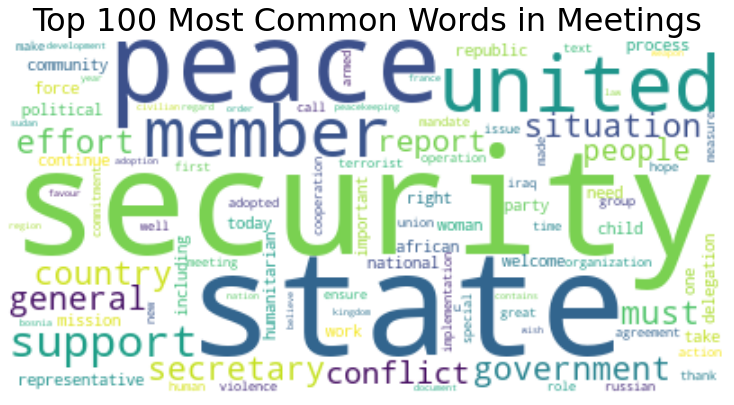

In [104]:
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt


mostcommon = FreqDist(allwords_in_meetings).most_common(100)

wordcloud = WordCloud(background_color='white').generate(' '.join(dict(mostcommon)))
fig = plt.figure(figsize=(10,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words in Meetings', fontsize=32)

plt.tight_layout(pad=0)
plt.show()

# Make the dataframe accessible in other Notebooks

In [83]:
%store pre_processed_df

Stored 'pre_processed_df' (DataFrame)
